# Proyek A/B Testing: Meningkatkan Sistem Rekomendasi di Toko Online Internasional


## Pendahuluan
Pada tanggal 7 Desember 2020, toko online internasional meluncurkan sebuah uji coba A/B dengan tujuan menguji perubahan terkait pengenalan sistem rekomendasi yang ditingkatkan. Uji coba ini diberi nama "recommender_system_test" dan terbagi menjadi dua kelompok: Kelompok A sebagai kontrol dan Kelompok B dengan embel-embel rute pembayaran baru.


## Tujuan
- Tujuan Uji Coba: Menguji perubahan terkait pengenalan sistem rekomendasi yang ditingkatkan.
    - Hasil yang Diharapkan: Dalam waktu 14 hari sejak pendaftaran, pengguna akan menunjukkan peningkatan konversi ke tampilan halaman produk (event `product_page`), tampilan kartu produk (event `product_card`), dan pembelian (`event purchase`). Setiap tahap dari funnel `product_page` → `product_card` → `purchase` harus mengalami peningkatan minimal 10%.


## Tahapan
Terdapat 4 file .csv(**berada di deskripsi teknis**) untuk tahapan ini, yaitu Berikut tahapan-tahapan yang akan kita lakukan:


1. Mengeksplorasi Data:
    - Konversi Tipe Data: Memeriksa apakah perlu mengonversi tipe data pada setiap file data yang diberikan.
    - Data Duplikat dan Hilang: Menemukan adanya nilai duplikat atau hilang dalam dataset. Jika ada, menjelaskan sifat dan dampaknya terhadap analisis.

2. Analisis Data Eksploratif (EDA):
    - Distribusi Jumlah Event per Pengguna: Menyelidiki apakah jumlah event per pengguna didistribusikan secara merata di antara sampel A dan B.
    - Pengguna yang Masuk ke Dua Sampel: Mengidentifikasi apakah ada pengguna yang masuk ke kedua sampel, dan jika ada, mengevaluasi dampaknya terhadap hasil uji coba.
    - Distribusi Jumlah Event per Hari: Menganalisis cara distribusi jumlah event berdasarkan hari.

3. Menganalisis Konversi di Berbagai Tahap Funnel:
    - Mengidentifikasi dan menganalisis tingkat konversi pengguna pada setiap tahap funnel, yaitu dari tampilan halaman produk (product_page) ke tampilan kartu produk (product_card) hingga pembelian (purchase)

4. Evaluasi Hasil A/B Test:
    - Interpretasi Hasil A/B Test: Menyajikan temuan dan kesimpulan dari hasil uji coba A/B, apakah terdapat perbedaan yang signifikan di antara kelompok A (kontrol) dan B (rute pembayaran baru).
    - Penggunaan Z-Criterion: Menggunakan z-criterion untuk memeriksa perbedaan statistik antara proporsi pada kedua kelompok.




### Deskripsi Teknis

1. Test Name: `recommender_system_test`
2. Kelompok: A (kontrol), B (rute pembayaran baru)
3. Tanggal Peluncuran: 7 Desember 2020
4. Tanggal Berhenti Menerima Pengguna Baru: 21 Desember 2020
5. Tanggal Berakhir: 1 Januari 2021
6. Audience: 15% dari pengguna baru dari wilayah UE (Uni Eropa)
7. Tujuan Uji Coba: Menguji perubahan terkait pengenalan sistem rekomendasi yang ditingkatkan.
8. Hasil yang Diharapkan: Dalam waktu 14 hari sejak pendaftaran, pengguna akan menunjukkan peningkatan konversi ke tampilan halaman produk (event `product_page`), tampilan kartu produk (event `product_card`), dan pembelian (event `purchase`). Setiap tahap dari funnel `product_page` → `product_card` → `purchase` harus mengalami peningkatan minimal 10%.
9. Jumlah Peserta yang Diharapkan: 6000 orang.

- `ab_project_marketing_events_us.csv` — kelendar event marketing untuk tahun 2020 
- `final_ab_new_users_upd_us.csv` — seluruh pengguna yang mendaftar pada toko online dari tanggal 7 Desember - 21 Desember tahun 2020 
- `final_ab_events_upd_us.csv` — seluruh event untuk pengguna baru pada periode 7 Desember 2020 hingga 1 Januari 2021. 
- `final_ab_participants_upd_us.csv` — tabel terdiri dari test partisipasi 

isi dari`ab_project_marketing_events_us.csv`:

- `name` — nama marketing event
- `regions` — wilayah mana yang akan diselenggarakan(ad campaign)
- `start_dt` — tanggal mulai
- `finish_dt` — tanggal berakhir(ad campaign)

isi dari`final_ab_new_users_upd_us.csv`:

- `user_id` 
- `first_date` — tanggal daftar
- `region`
- `device` — perangkat yang digunakan untuk daftar

isi dari`final_ab_events_upd_us.csv`:

- `user_id`
- `event_dt` — tanggal dan waktu event 
- `event_name` — jenis event
- `details` — data tambahan terhadap event (contohnya seperti: order total dalam kurs dollar untuk kolom event `purchase`)

isi dari `final_ab_participants_upd_us.csv`:

- `user_id`
- `ab_test` — nama test 
- `group` — kelompok test yang dimiliki 


-------

## Inisialisasi 
- Import library yang dibutuhkan.

In [1]:
# list library yang digunakan
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

----

## Memuat Data
- Memuat data yang sudah kita definiskan dan membuat varibale untuk memanggil file-file .csv.

In [2]:
# Memuat datasets
project_marketing_df = pd.read_csv('/datasets/ab_project_marketing_events_us.csv') 
final_ab_new_users_df = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
final_ab_events_df = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
final_ab_participants_df = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')


------

## Mengeksploarsi Data
- Kita akan telusuri data yang akan kita eksplorasi dan menemukan sebuah temuan untuk pengaruh analisis. Kita akan masukan tahapan ini sebagai Pra-pemrosesan data ke dalam sub bab.

### Pra-pemrosesan Data `project_marketing_df`
- Lakukan pra-pemrosesan data untuk dataframe project marketing

In [3]:
# melihat informasi project_marketing_df
project_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


<font color = green> Temuan </font>
- Tidak ada nilai yang hilang untuk dataframe `project_marketing_df`.

In [4]:
# melihat isi dari project_marketing_df
project_marketing_df

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<font color = green> Temuan </font>
- Kita akan ubah tipe data `start_df` dan `finish_dt` menjadi `to_datetime`

In [5]:
# mengubah tipe data pada dataframe project_marketing
project_marketing_df['start_dt'] = pd.to_datetime(project_marketing_df['start_dt'])
project_marketing_df['finish_dt'] = pd.to_datetime(project_marketing_df['finish_dt'])

In [6]:
# memeriksa kembali informasi project_marketing_df
project_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [7]:
# memeriksa kembali isi dari project_marketing_df
project_marketing_df

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<font color = green> Kesimpulan Sementara </font>
- Tidak ada nilai yang hilang untuk `project_marketing_df`, namun kita telah mengubah tipe data date menjadi to_datetime untuk kolom yang dibutuhkan konversi.

------

### Pra-pemrosesan Data `final_ab_new_users`
- Pra-pemrosesan data untuk `final_ab_new_users`.

In [8]:
# periksa informasi dari dataframe final_ab_new_users 
final_ab_new_users_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


<font color = green> Temuan </font>
- Tidak ditemukan nilai yang hilang untuk dataframe `final_ab_new_users`. 

In [9]:
# mari kita periksa isi dari dataframe final_ab_new_users 
final_ab_new_users_df 

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


<font color = green> Temuan </font>
- Kita akan mengubah tipe data `first_date` menjadi to_datetime.

In [10]:
# mengubah tipe data kolom first_date
final_ab_new_users_df['first_date'] = pd.to_datetime(final_ab_new_users_df['first_date'])

In [11]:
# memeriksa kembali informasi dataframe final_ab_new_users_df
final_ab_new_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [12]:
# memeriksa kembali isi dari dataframe final_ab_new_users_df
final_ab_new_users_df

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


<font color = green> Kesimpulan Sementara </font>
- Tidak ada nilai yang hilang untuk dataframe`final_ab_new_users_df`dan hanya satu kolom yang kita konversi menjadi to_datetime yaitu `first_date`.

-----

### Pra-pemrosesan Data `final_ab_events_df` 
- Pra-pemrosesan data untuk `final_ab_events_df` 

In [13]:
# memeriksa informasi dataframe final_ab_events_df 
final_ab_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


<font color = green> Temuan </font>
- Terdapat nilai hilang pada kolom `details`

Mari kita lihat seberapa besar pesentase hilangnya nilai tersebut

In [14]:
missing_percentage = final_ab_events_df.isnull().mean() * 100
missing_percentage

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details       85.766977
dtype: float64

<font color = green> Temuan </font>
- Nilai hilang sangat besar. Hal ini akan memungkinkan sangat berpengaruh pada kepentingan analisis.

In [15]:
# memeriksa isi dari dataframe final_ab_events_df 
final_ab_events_df

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [16]:
# memeriksa isi dari dataframe final_ab_events_df 
final_ab_events_df.head(50)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


<font color = green> Temuan </font>
- Apakah selain hilangnya nilai kita bisa melihat ada outliers di dalamnya? Seperti nilai 499.99

In [17]:
# memeriksa isi dari dataframe final_ab_events_df 
final_ab_events_df.tail(50)

,user_id,event_dt,event_name,details
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,NaN
423712,A642073B9C52486C,2020-12-29 19:03:56,login,NaN
423713,FC1CFAD3D39BF27D,2020-12-29 22:30:00,login,NaN
423714,C945594FC3AD3FFD,2020-12-29 02:40:09,login,NaN
423715,DCA0CF0B7C7FCE31,2020-12-29 12:28:31,login,NaN
423716,1C2500A1C9F55A83,2020-12-29 05:10:54,login,NaN
423717,25CA1F6A48E25397,2020-12-29 13:50:25,login,NaN
423718,8CE3B6FD918462B4,2020-12-29 17:55:44,login,NaN
423719,15E83BE89AC19DDF,2020-12-29 10:06:48,login,NaN
423720,F393A2F75D0E8ED2,2020-12-29 21:46:04,login,NaN


<font color = green> Temuan </font>
- Kita harus mengetahui event apa saja yang dimiliki untuk melakukan proses. Jika kita lihat bahwa details terhadap nilai purchase dalam kolom event, bisa dipastikan itu adalah sebuah jumlah uang yang dikeluarkan. Hal ini dikarenakan nilai details adalah float.

In [18]:
# melihat nilai unik untuk kolom event_name
unique_event_names = final_ab_events_df['event_name'].unique()

In [19]:
unique_event_names

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [20]:
final_ab_events_df[final_ab_events_df['event_name'] ==  'purchase']

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
60309,1455450835F72F5E,2020-12-30 09:27:10,purchase,4.99
60310,339C4C55021A83C6,2020-12-30 12:55:08,purchase,9.99
60311,D1553B56FFA8974B,2020-12-30 03:15:35,purchase,4.99
60312,245E85F65C358E08,2020-12-30 19:35:55,purchase,9.99


<font color = green> Temuan </font>
- Bisa dipastikan yang memiliki nilai kosong hanyalah `product_cart`, `product_page`, dan `login`. Kita jangan mengisi nilai kosong terlebih dahulu, karena kita harus tau keterkaitan antara nilai-nilai tersebut. Karena nilai purchase memiliki jumlah nilai yang pas hilang nya yaitu 60314 dari 423761.

In [21]:
# mengubah tipe data event_dt untuk dataframe final_ab_events_df
final_ab_events_df['event_dt'] = pd.to_datetime(final_ab_events_df['event_dt'])

In [22]:
# memeriksa informasi final_ab_events_df
final_ab_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [23]:
# memeriksa isi dari final_ab_events_df
final_ab_events_df

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


<font color = green> Kesimpulan Sementara </font>
- Kita akan biarkan nilai kosong terlebih dahulu untuk dataframe `final_ab_events_df`, karena kita harus mengetahui relevansi untuk masing-masing nilai terhadap kolom `details`

-------

### Pra-pemrosesan Data `final_ab_participants_df`
- Kita akan lakukan pra-pemrosesan data untuk dataframe `final_ab_participants_df`

In [24]:
# memeriksa informasi dari dataframe final_ab_participants_df
final_ab_participants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [25]:
# memeriksa isi dari dataframe final_ab_participants_df
final_ab_participants_df

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


<font color = green> Temuan </font>
- Tidak ada dataframe yang harus dikonversi untuk `final_ab_participants_df`

<font color = green> Kesimpulan Sementara </font>
- Sesuai namanya dataframe `final_ab_participants_df` merupakan isi dari masing-masing kelompok. Kita akan banyak menggunakan sample dari dataframe tersebut.

--------

## Analisis Data Eksploratif (EDA)
- Kita akan melakukan exploratory data analysis. Untuk melakukan ini kita harus menjawab tahapan yang sudah diuraikan.

### Distribusi Jumlah Event per Pengguna:
-  Menyelidiki apakah jumlah event per pengguna didistribusikan secara merata di antara sampel A dan B.

In [26]:
# gabungkan dataframe final_ab_events_df dan final_ab_participants_df  
merged_df = pd.merge(final_ab_events_df, final_ab_participants_df, on='user_id', how='left')



- Gabungkan DataFrame final_ab_events_df dengan final_ab_participants_df berdasarkan kolom user_id untuk mendapatkan informasi kelompok (A atau B) dari setiap pengguna.

In [27]:
# menggunakan groupby hitung pengguna dan tambahkan kolom baru untuk menyimpan informasi
events_per_user = merged_df.groupby(['ab_test', 'user_id']).size().reset_index(name='event_count')

- Hitung jumlah event per pengguna dan tambahkan kolom baru untuk menyimpan informasi ini.

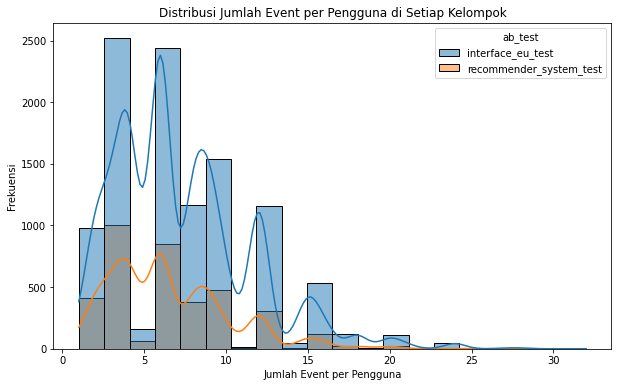

In [28]:
# membuat visualisasi distribusi dari kedua ab_test
plt.figure(figsize=(10, 6))
sns.histplot(data=events_per_user, x='event_count', hue='ab_test', bins=20, kde=True)
plt.title('Distribusi Jumlah Event per Pengguna di Setiap Kelompok')
plt.xlabel('Jumlah Event per Pengguna')
plt.ylabel('Frekuensi')
plt.show()

- Selanjutnya, analisis distribusi jumlah event per pengguna di setiap kelompok (A dan B). Gunakan metode seperti describe() untuk mendapatkan statistik deskriptif dan visualisasi seperti histogram untuk melihat distribusi.

<font color = green> Kesimpulan Sementara </font>
- Dari visualisasi di atas (**bagian 1.7.1**), kita dapat melihat bahwa distribusi dari ab_test kurang merata. `recommender_system_test` cenderung lebih rendah daripada `interface_eu_test`.

-----

### Pengguna yang Masuk ke Dua Sampel:
- Mengidentifikasi apakah ada pengguna yang masuk ke kedua sampel, dan jika ada, mengevaluasi dampaknya terhadap hasil uji coba

In [29]:
users_in_both_groups = final_ab_participants_df[final_ab_participants_df.duplicated('user_id', keep=False)]


- Gunakan DataFrame `final_ab_participants_df` untuk memeriksa apakah ada pengguna yang terdapat dalam kedua kelompok A dan B.

In [30]:
if not users_in_both_groups.empty:
    print("Ada pengguna yang masuk ke kedua sampel.")
    # Tindakan lebih lanjut sesuai kebutuhan (misalnya, analisis terpisah atau pengecualian dari hasil)
else:
    print("Tidak ada pengguna yang masuk ke kedua sampel.")

Ada pengguna yang masuk ke kedua sampel.


Evaluasi Dampaknya terhadap Hasil Uji Coba:
- Jika terdapat pengguna yang masuk ke kedua sampel, perlu dievaluasi dampaknya terhadap hasil uji coba. Ini dapat memengaruhi interpretasi hasil dan kesimpulan yang diambil. Kita akan coba mengambil analisis terpisah.

In [31]:
events_for_users_in_both_groups = final_ab_events_df[final_ab_events_df['user_id'].isin(users_in_both_groups['user_id'])]


In [32]:
# Gabungkan DataFrame events_for_users_in_both_groups dengan final_ab_participants_df
events_for_users_in_both_groups = pd.merge(events_for_users_in_both_groups, final_ab_participants_df[['user_id', 'ab_test']], on='user_id', how='left')


- Gunakan informasi pengguna yang telah diidentifikasi untuk memfilter data event pada DataFrame final_ab_events_df.

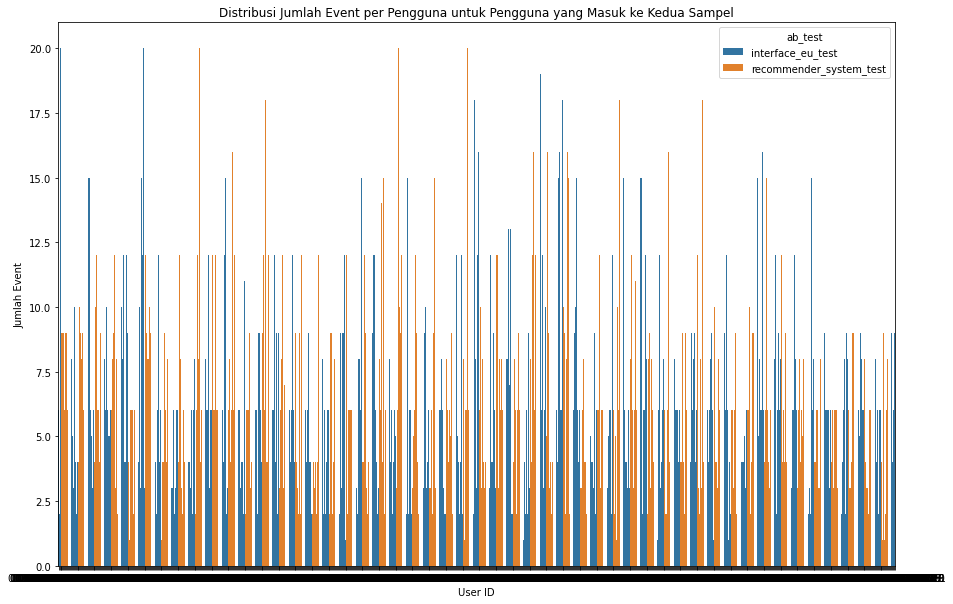

In [33]:
events_per_user_both_groups = events_for_users_in_both_groups.groupby(['user_id', 'ab_test']).size().reset_index(name='event_count')

plt.figure(figsize=(15, 10))
sns.barplot(data=events_per_user_both_groups, x='user_id', y='event_count', hue='ab_test')
plt.title('Distribusi Jumlah Event per Pengguna untuk Pengguna yang Masuk ke Kedua Sampel')
plt.xlabel('User ID')
plt.ylabel('Jumlah Event')
plt.show()

<font color = green> Kesimpulan Sementara </font>

Berdasarkan rujukan code:

`if not users_in_both_groups.empty:
    print("Ada pengguna yang masuk ke kedua sampel.")
    # Tindakan lebih lanjut sesuai kebutuhan (misalnya, analisis terpisah atau pengecualian dari hasil)
else:
    print("Tidak ada pengguna yang masuk ke kedua sampel.")`
    
- Terdapat yang masuk ke dua sample. Kita bisa melihat distribusi yang fluktuatif dan tidak merata. Namun beberapa ab_test ada yang mendapatkan nilai event paling tinggi. Bisa dipastikan user melakukan proses hingga akhir.
- Jika kita interpertasikan ke pengaruh uji coba, pengguna yang terlibat dalam kedua kelompok dapat memperkenalkan noise atau variabilitas tambahan ke dalam data, yang dapat memengaruhi hasil uji coba. Dalam beberapa kasus, ini dapat membuat interpretasi hasil menjadi lebih kompleks.

-----

### Distribusi Jumlah Event per Hari
- Menganalisis cara distribusi jumlah event berdasarkan hari.

In [34]:
# ekstraksi informasi tanggal seperti hari dari kolom event_dt
final_ab_events_df['day'] = final_ab_events_df['event_dt'].dt.day


In [35]:
# analisis distribusi jumlah event per hari 
events_per_day = final_ab_events_df.groupby('day').size().reset_index(name='event_count')


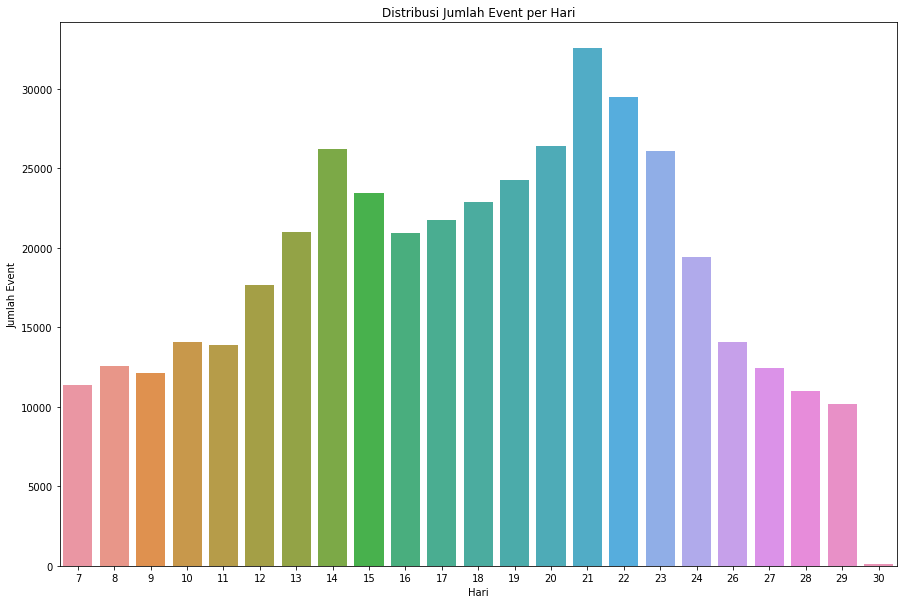

In [36]:
# visualisasi histogram 
plt.figure(figsize=(15, 10))
sns.barplot(data=events_per_day, x='day', y='event_count')
plt.title('Distribusi Jumlah Event per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Event')
plt.show()


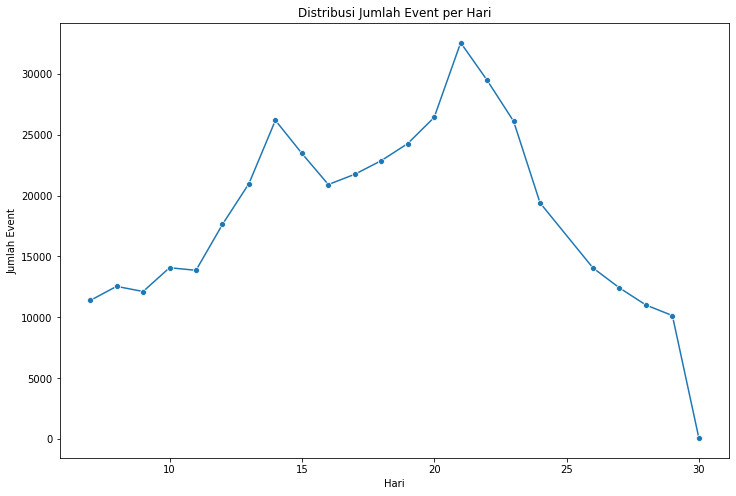

In [37]:
# visualisasi lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=events_per_day, x='day', y='event_count', marker='o')
plt.title('Distribusi Jumlah Event per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Event')
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Jumlah kepadatan event (**1.7.3**) berada di sekitar hari ke 20. Di hari-hari tersebut memeiliki traffict yang sangat tinggi. Serta di akhir bulan mengalami penurunan yang signifikan.

--------

## Menganalisis Konversi di Berbagai Tahap Funnel
- Melihat bagaimana konversi untuk funnel.

### Mengidentifikasi dan Menganalisis Tingkat Konversi Pengguna pada Setiap Tahap funnel
- Identifikasi tingkat konversi untuk setiap pengguna melalui funnel yang tersedia.

In [38]:
# identifikasi jumlah unik ppengguna di setiap tahap funnel
users_product_page = final_ab_events_df[final_ab_events_df['event_name'] == 'product_page']['user_id'].unique()
users_product_card = final_ab_events_df[final_ab_events_df['event_name'] == 'product_cart']['user_id'].unique()
users_purchase = final_ab_events_df[final_ab_events_df['event_name'] == 'purchase']['user_id'].unique()


In [39]:
# hitung tingkat konversi di setiap tahap|
conversion_product_page_to_card = len(users_product_card) / len(users_product_page)
conversion_card_to_purchase = len(users_purchase) / len(users_product_card)

print(f'Tingkat konversi dari product_page ke product_card: {conversion_product_page_to_card:.2%}')
print(f'Tingkat konversi dari product_card ke purchase: {conversion_card_to_purchase:.2%}')


Tingkat konversi dari product_page ke product_card: 49.54%
Tingkat konversi dari product_card ke purchase: 101.47%


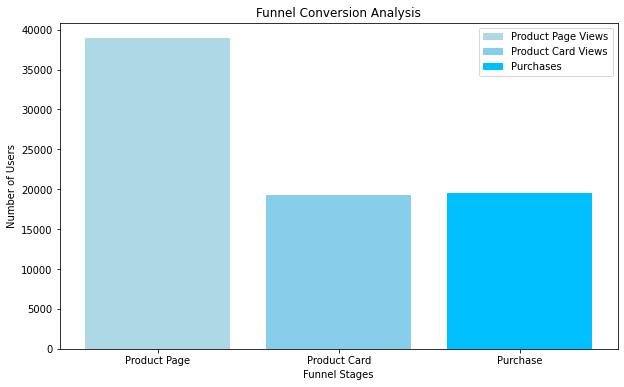

In [40]:
# visualisasi grafik funnel
plt.figure(figsize=(10, 6))

# Bar pertama (tampilan halaman produk)
plt.bar(0, len(users_product_page), color='lightblue', label='Product Page Views')

# Bar kedua (tampilan kartu produk)
plt.bar(1, len(users_product_card), color='skyblue', label='Product Card Views')

# Bar ketiga (pembelian)
plt.bar(2, len(users_purchase), color='deepskyblue', label='Purchases')

plt.title('Funnel Conversion Analysis')
plt.xlabel('Funnel Stages')
plt.ylabel('Number of Users')
plt.xticks([0, 1, 2], ['Product Page', 'Product Card', 'Purchase'])
plt.legend()
plt.show()


<font color = green> Kesimpulan Sementara </font>]
- Jika jumlah pengguna pada tahap (**1.8.1**) tampilan halaman produk (Product Page) dalam funnel conversion analysis jauh lebih tinggi dibandingkan dengan tahap-tahap berikutnya (tampilan kartu produk dan pembelian), ini dapat diinterpretasikan sebagai indikasi bahwa sebagian besar pengguna cenderung berhenti atau tidak melanjutkan ke tahap-tahap selanjutnya dalam funnel.

------- 

## Evaluasi Hasil A/B Test
- Evaluasi hasil A/B testing yang telah kita analisis.

### Interpretasi Hasil A/B Test
- Mari kita lihat apa yang bisa kita simpulkan dari hasil A/B Testing.

In [41]:
alpha = 0.05

# untuk uji z pada konversi pembelian
control_group = final_ab_participants_df[final_ab_participants_df['group'] == 'A']['user_id'].unique()
treatment_group = final_ab_participants_df[final_ab_participants_df['group'] == 'B']['user_id'].unique()

# hitung jumlah pembelian pada masing-masing kelompok
purchase_control = final_ab_events_df[(final_ab_events_df['user_id'].isin(control_group)) & (final_ab_events_df['event_name'] == 'purchase')]['user_id'].nunique()
purchase_treatment = final_ab_events_df[(final_ab_events_df['user_id'].isin(treatment_group)) & (final_ab_events_df['event_name'] == 'purchase')]['user_id'].nunique()

# hitung jumlah total pengguna pada masing-masing kelompok
total_users_control = len(control_group)
total_users_treatment = len(treatment_group)

# melakukan uji z pada konversi pembelian
stat, p_value = proportions_ztest([purchase_control, purchase_treatment], [total_users_control, total_users_treatment])
print(f'Nilai p dari uji z: {p_value}')


if p_value < alpha:
    print("Nilai p kurang dari alpha. Reject hipotesis nol.")
    print("Ada perbedaan yang signifikan antara kelompok A dan B.")
else:
    print("Nilai p lebih besar dari alpha. Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak ada perbedaan yang signifikan antara kelompok A dan B.")

Nilai p dari uji z: 0.03355878472437525
Nilai p kurang dari alpha. Reject hipotesis nol.
Ada perbedaan yang signifikan antara kelompok A dan B.


<font color = green> Kesimpulan Sementara </font>
- Dengan alpha 0.05 (**1.9.1**) kita bisa melihat bahwa dalam konteks A/B testing, ini berarti bahwa rute pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).

-----

### Penggunaan Z-Criterion
-  Menggunakan z-criterion untuk memeriksa perbedaan statistik antara proporsi pada kedua kelompok.

In [42]:
# Hitung proporsi dan perbedaan proporsi
prop_control = purchase_control / total_users_control
prop_treatment = purchase_treatment / total_users_treatment
prop_diff = prop_treatment - prop_control

# Hitung standar deviasi gabungan
pooled_std_dev = np.sqrt(prop_control * (1 - prop_control) / total_users_control + prop_treatment * (1 - prop_treatment) / total_users_treatment)

# Hitung nilai z
z_value = prop_diff / pooled_std_dev

# Tentukan nilai kritis dari distribusi normal standar
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

# Interpretasi hasil
if np.abs(z_value) > z_critical:
    print("Nilai z melebihi nilai kritis. Terdapat perbedaan yang signifikan antara dua kelompok.")
else:
    print("Nilai z tidak melebihi nilai kritis. Tidak cukup bukti untuk menyimpulkan adanya perbedaan yang signifikan antara dua kelompok.")

Nilai z melebihi nilai kritis. Terdapat perbedaan yang signifikan antara dua kelompok.


<font color = green> Kesimpulan Sementara </font>
- Interpretasi yang cukup untuk hasil tersebut adalah bahwa terdapat perbedaan yang signifikan antara dua kelompok dalam hal proporsi konversi pembelian. Dengan kata lain, rute pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).

------

## **Kesimpulan Umum**

- Tidak ada nilai yang hilang untuk project_marketing_df, namun kita telah mengubah tipe data date menjadi to_datetime untuk kolom yang dibutuhkan konversi.
- Tidak ada nilai yang hilang untuk dataframe final_ab_new_users_dfdan hanya satu kolom yang kita konversi menjadi to_datetime yaitu first_date
- Kita akan biarkan nilai kosong terlebih dahulu untuk dataframe `final_ab_events_df`, karena kita harus mengetahui relevansi untuk masing-masing nilai terhadap kolom `details`
- Sesuai namanya dataframe `final_ab_participants_df` merupakan isi dari masing-masing kelompok. Kita akan banyak menggunakan sample dari dataframe tersebut.
- Dari visualisasi di atas (**bagian 1.7.1**), kita dapat melihat bahwa distribusi dari ab_test kurang merata. `recommender_system_test` cenderung lebih rendah daripada `interface_eu_test`.
-----
- Berdasarkan rujukan code:

`if not users_in_both_groups.empty:
    print("Ada pengguna yang masuk ke kedua sampel.")
    # Tindakan lebih lanjut sesuai kebutuhan (misalnya, analisis terpisah atau pengecualian dari hasil)
else:
    print("Tidak ada pengguna yang masuk ke kedua sampel.")`
    
- Terdapat yang masuk ke dua sample. Kita bisa melihat distribusi yang fluktuatif dan tidak merata. Namun beberapa ab_test ada yang mendapatkan nilai event paling tinggi. Bisa dipastikan user melakukan proses hingga akhir.
- Jika kita interpertasikan ke pengaruh uji coba, pengguna yang terlibat dalam kedua kelompok dapat memperkenalkan noise atau variabilitas tambahan ke dalam data, yang dapat memengaruhi hasil uji coba. Dalam beberapa kasus, ini dapat membuat interpretasi hasil menjadi lebih kompleks.

----

- Jumlah kepadatan event (**1.7.3**) berada di sekitar hari ke 20. Di hari-hari tersebut memeiliki traffict yang sangat tinggi. Serta di akhir bulan mengalami penurunan yang signifikan.
- Jika jumlah pengguna pada tahap (**1.8.1**) tampilan halaman produk (Product Page) dalam funnel conversion analysis jauh lebih tinggi dibandingkan dengan tahap-tahap berikutnya (tampilan kartu produk dan pembelian), ini dapat diinterpretasikan sebagai indikasi bahwa sebagian besar pengguna cenderung berhenti atau tidak melanjutkan ke tahap-tahap selanjutnya dalam funnel.
- Dengan alpha 0.05 (**1.9.1**) kita bisa melihat bahwa dalam konteks A/B testing, ini berarti bahwa rute pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).
- Interpretasi yang cukup untuk hasil tersebut adalah bahwa terdapat perbedaan yang signifikan antara dua kelompok dalam hal proporsi konversi pembelian. Dengan kata lain, rute pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).

## **Garis Besar Evaluasi**
- Dengan demikian, evaluasi dari proyek A/B Testing ini menunjukkan bahwa implementasi rute pembayaran baru memiliki dampak yang signifikan dalam meningkatkan konversi pembelian dibandingkan dengan metode sebelumnya (kelompok kontrol). Oleh karena itu, rekomendasi dapat diberikan untuk melanjutkan penggunaan rute pembayaran baru berdasarkan hasil yang positif dari uji coba ini.

- Peningkatan Konversi:
    - Kita telah mengidentifikasi perbedaan yang signifikan antara kelompok kontrol dan perlakuan dalam hal konversi pembelian. Hal ini menunjukkan bahwa implementasi rute pembayaran baru (kelompok B) telah berhasil meningkatkan konversi pembelian dibandingkan dengan metode sebelumnya (kelompok kontrol).
    - Namun, untuk memastikan apakah peningkatan konversi sesuai dengan yang diharapkan (minimal 10%), kita perlu memeriksa persentase peningkatan pada setiap tahap funnel (tampilan halaman produk, tampilan kartu produk, dan pembelian) dalam periode 14 hari setelah pendaftaran.

- Analisis Tahap Funnel:
    - Kita telah menganalisis konversi pada berbagai tahap funnel dan menemukan bahwa sebagian besar pengguna cenderung berhenti atau tidak melanjutkan ke tahap-tahap berikutnya setelah tampilan halaman produk. Hal ini menunjukkan bahwa ada potensi untuk meningkatkan tingkat konversi pada tahap-tahap berikutnya.


